<a href="https://colab.research.google.com/github/quantumseminar/textbook/blob/main/04gate/06teleportation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q qiskit qiskit-aer pylatexenc

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 25.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 32.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 2.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 45.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 5.4 MB/s eta 0:00:00


In [4]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator

import numpy as np
from numpy import pi
import matplotlib.pyplot as plt
%matplotlib inline
from qiskit import *
from qiskit.visualization import plot_histogram, plot_bloch_multivector, array_to_latex


## 量子テレポーテーション
量子ゲートを使って、量子の状態を移動させます。

参考資料：
https://qiita.com/Lagrangian/items/e8f726157025f0f288df

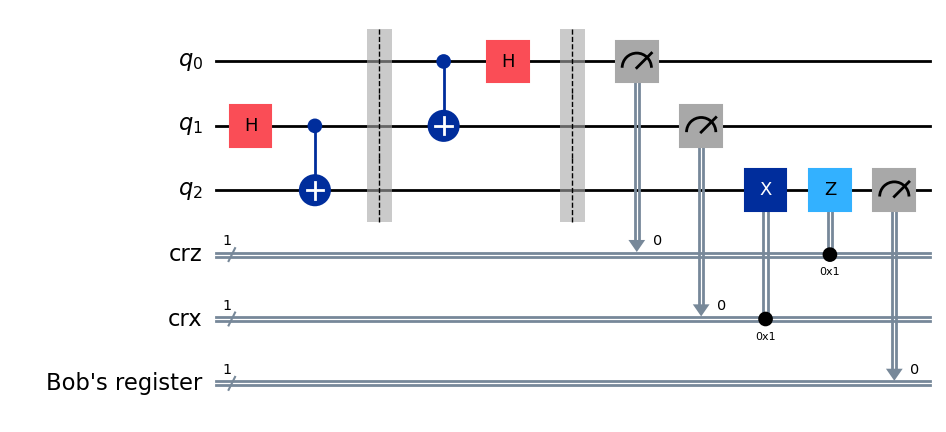

In [8]:
# 量子レジスタと古典レジスタを準備
qr = QuantumRegister(3, name='q')
crz = ClassicalRegister(1, name='crz')
crx = ClassicalRegister(1, name='crx')

qc = QuantumCircuit(qr, crz, crx)

# q1 と q2 を量子もつれ状態とする
qc.h(1)
qc.cx(1, 2)

qc.barrier()

# 転送したいq0 と q1 について相互作用させる
qc.cx(0, 1)
qc.h(0)

qc.barrier()

# アリスさんが持っているq0 と q1 を測定する
qc.measure(0, 0)
qc.measure(1, 1)

# アリスさんの測定結果に応じてボブさん側で演算を行う
qc.x(2).c_if(crx, 1)
qc.z(2).c_if(crz, 1)

# ボブさんの持っている q2 を測定する
cr_result = ClassicalRegister(1, 'Bob\'s register')
qc.add_register(cr_result)
qc.measure(2, 2)

# 量子回路の描画処理
qc.draw('mpl')

Counts(ideal): {'0 0 1': 239, '0 0 0': 281, '0 1 0': 262, '0 1 1': 242}


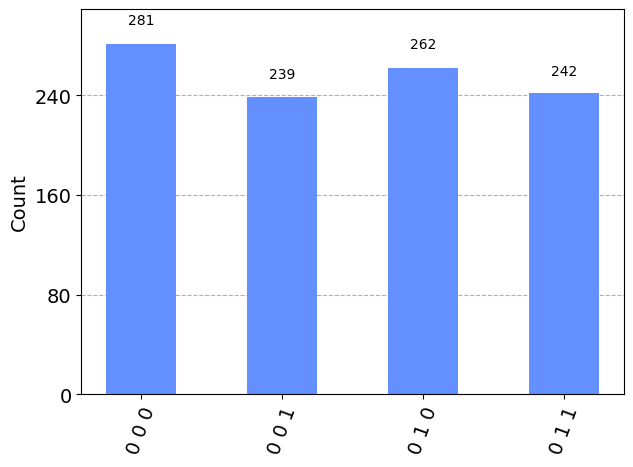

In [10]:
aersim = AerSimulator(method='statevector')

result = aersim.run(qc).result()
counts = result.get_counts(0)
print('Counts(ideal):', counts)

# 測定結果の頻度を棒グラフで表示
plot_histogram(counts)